Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Qualidade de Dados em Saúde para IA**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

**Aluno: Fábio C. Simões**

Mais informações: https://ciia-saude.medicina.ufmg.br/

# **Limpeza, tratamento e recodificação de Dados**

* Análise da qualidade das variáveis numéricas
* Recodificação de variáveis
* Salvando a base de dados corrigida

# Abrir a base de dados

In [1]:
# Importar as bibliotecas para trabalhar com base de dados e gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/qds/BD_PARTOS_corrigida.xlsx'

# Ler todos os dados e colocar na variável dados
dados = pd.read_excel(arquivo)

# Mostrar destalhes/informações das variáveis importadas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1709 non-null   int64         
 1   DT_INTERNACAO       1709 non-null   datetime64[ns]
 2   DT_ALTA             1709 non-null   datetime64[ns]
 3   DURACAO_INT         1709 non-null   float64       
 4   GESTACOES           1709 non-null   int64         
 5   PARTOS              1708 non-null   float64       
 6   IG_OBSTETRA         1689 non-null   float64       
 7   IG_PEDIATRA         1706 non-null   float64       
 8   ALTO_RISCO          1709 non-null   object        
 9   TIPO_PARTO          1709 non-null   int64         
 10  HIPERTENSAO         1709 non-null   int64         
 11  GEMELAR             1709 non-null   int64         
 12  CESAREAS_PREVIAS    1702 non-null   float64       
 13  EPISIOTOMIA         1709 non-null   int64       

In [3]:
# Mostrar um resumo dos dados (as 5 primeiras linhas e 5 últimas 5 linhas)
dados

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,...,SEXO,PESO_NASCER,APGAR1,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,BAIRRO
0,0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,...,1,3590.0,9.0,10,0,2,0,3405.0,3385.000000,Coqueiros
1,1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,...,1,2660.0,9.0,9,0,1,0,2595.0,2570.000000,Nossa Senhora de Fátima
2,2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,...,2,3075.0,9.0,10,0,2,0,3910.0,3675.000000,São Lucas
3,3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,...,1,3505.0,9.0,10,0,2,0,3275.0,3300.000000,Jardim Vitória
4,4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,...,1,3405.0,5.0,8,0,1,0,620.0,3078.450462,Alto dos Pinheiros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,...,2,2940.0,9.0,9,0,1,0,NaN,3840.000000,Jardim Montanhês
1705,1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,...,1,1945.0,2.0,9,1,1,0,3000.0,2660.000000,Letícia
1706,1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,...,1,2275.0,7.0,9,1,1,0,NaN,2610.000000,São Lucas
1707,1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,...,1,2590.0,7.0,9,1,1,0,2660.0,2675.000000,Nossa Senhora de Fátima


# Análise da qualidade das variáveis numéricas - (análise descritiva)

In [4]:
# Resumo descritivo das colunas numéricas
# Observação: que o Python entendeu como númerica na importação
dados.describe()

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,TIPO_PARTO,HIPERTENSAO,...,VIVO,SEXO,PESO_NASCER,APGAR1,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B
count,1709.000000,1709,1709,1709.000000,1709.000000,1708.000000,1689.000000,1706.000000,1709.000000,1709.000000,...,1673.000000,1709.00000,1681.000000,1651.000000,1709.000000,1709.000000,1709.000000,1709.000000,853.000000,1709.000000
mean,854.000000,2014-03-16 04:27:06.214160128,2014-03-19 06:49:30.157986816,3.019051,2.174371,0.953162,37.857904,37.941970,1.382095,0.130486,...,0.981470,1.44880,2977.876859,8.011508,8.851375,0.143944,1.583382,0.074898,3082.961313,3078.450462
min,0.000000,2013-09-27 00:00:00,2013-09-29 00:00:00,0.768750,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,...,0.000000,0.00000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,410.000000,1990.000000
25%,427.000000,2013-12-16 00:00:00,2013-12-19 00:00:00,1.606250,1.000000,0.000000,37.000000,37.000000,1.000000,0.000000,...,1.000000,1.00000,2710.000000,8.000000,9.000000,0.000000,1.000000,0.000000,2785.000000,2830.000000
50%,854.000000,2014-03-05 00:00:00,2014-03-08 00:00:00,2.070833,2.000000,1.000000,39.000000,39.000000,1.000000,0.000000,...,1.000000,1.00000,3065.000000,9.000000,9.000000,0.000000,2.000000,0.000000,3130.000000,3078.450462
75%,1281.000000,2014-05-29 00:00:00,2014-06-02 00:00:00,2.852778,3.000000,1.000000,40.000000,40.000000,2.000000,0.000000,...,1.000000,2.00000,3390.000000,9.000000,10.000000,0.000000,2.000000,0.000000,3360.000000,3335.000000
max,1708.000000,2014-10-31 00:00:00,2014-11-17 00:00:00,62.537500,17.000000,10.000000,42.000000,42.000000,2.000000,1.000000,...,1.000000,3.00000,5625.000000,10.000000,10.000000,1.000000,2.000000,3.000000,5290.000000,4125.000000
std,493.490121,NaN,NaN,4.320177,1.448984,1.226598,3.436104,3.189908,0.486042,0.336936,...,0.134897,0.56164,690.987646,1.863653,2.066552,0.351136,0.606062,0.437159,626.188775,422.334424


Função para conveter tipos de uma coluna em outro (float => int), só é possível se não houver NAN (vazios, missings, nulos)

dados.PARTOS = dados.PARTOS.apply(np.int64)

**Numéricas discretas**

In [5]:
# GESTACOES
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.GESTACOES.describe()

count    1709.000000
mean        2.174371
std         1.448984
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: GESTACOES, dtype: float64

In [6]:
# Contando a quantidade de casos
dados.GESTACOES.value_counts()

GESTACOES
1     687
2     520
3     251
4     130
5      62
6      38
7      12
8       3
9       2
11      2
17      1
13      1
Name: count, dtype: int64

<Axes: xlabel='GESTACOES', ylabel='Count'>

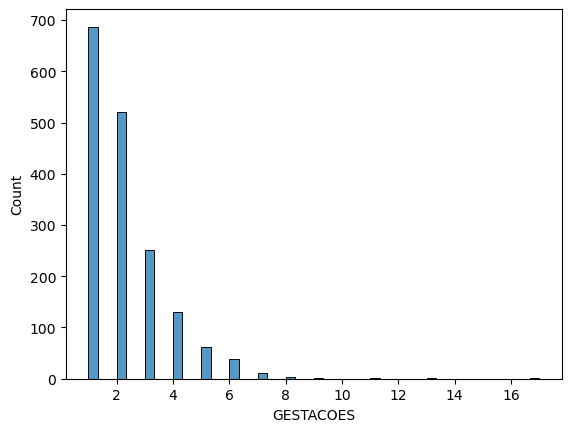

In [7]:
# Histograma
sns.histplot(dados.GESTACOES)

In [8]:
# PARTOS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.PARTOS.describe()

count    1708.000000
mean        0.953162
std         1.226598
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: PARTOS, dtype: float64

In [9]:
# Contando a quantidade de casos
dados.PARTOS.value_counts()

PARTOS
0.0     780
1.0     523
2.0     242
3.0      92
4.0      38
5.0      21
6.0       4
7.0       4
8.0       2
10.0      2
Name: count, dtype: int64

<Axes: xlabel='PARTOS', ylabel='Count'>

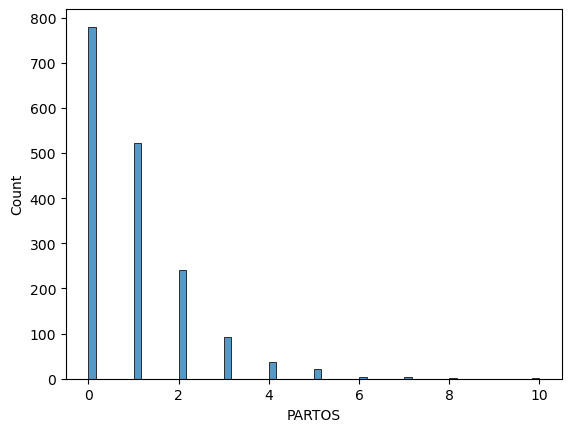

In [10]:
# Histograma
sns.histplot(dados.PARTOS)

In [11]:
# CESAREAS_PREVIAS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.CESAREAS_PREVIAS.describe()

count    1702.000000
mean        0.262045
std         0.600376
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: CESAREAS_PREVIAS, dtype: float64

In [12]:
# Contando a quantidade de casos
dados.CESAREAS_PREVIAS.value_counts()

CESAREAS_PREVIAS
0.0    1364
1.0     255
2.0      66
3.0      10
4.0       6
5.0       1
Name: count, dtype: int64

<Axes: xlabel='CESAREAS_PREVIAS', ylabel='Count'>

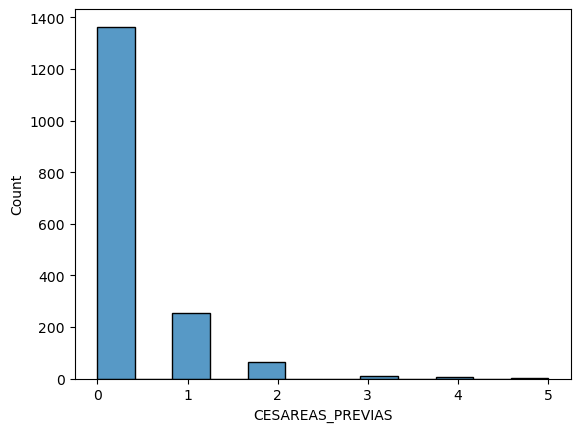

In [13]:
# Histograma
sns.histplot(dados.CESAREAS_PREVIAS)

**Numéricas discretas - com faixa de valores muito grandes**

In [14]:
# PESO_NASCER
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.PESO_NASCER.describe()

count    1681.000000
mean     2977.876859
std       690.987646
min       270.000000
25%      2710.000000
50%      3065.000000
75%      3390.000000
max      5625.000000
Name: PESO_NASCER, dtype: float64

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

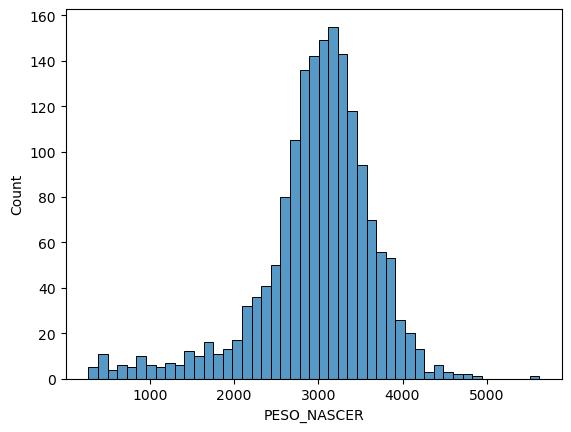

In [15]:
# Histograma
sns.histplot(dados.PESO_NASCER)

In [16]:
# IG_OBSTETRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.IG_OBSTETRA.describe()

count    1689.000000
mean       37.857904
std         3.436104
min         0.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_OBSTETRA, dtype: float64

<Axes: xlabel='IG_OBSTETRA', ylabel='Count'>

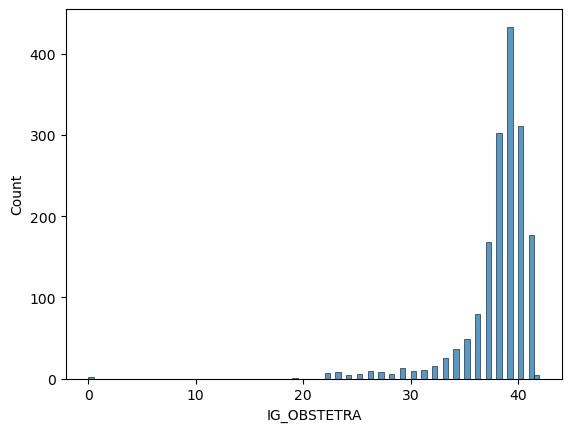

In [17]:
# Histograma
sns.histplot(dados.IG_OBSTETRA)

In [18]:
#  Limpeza de dados - 2 casos com IG = 0
dados.IG_OBSTETRA.value_counts()

IG_OBSTETRA
39.0    433
40.0    311
38.0    302
41.0    177
37.0    168
36.0     80
35.0     49
34.0     37
33.0     26
32.0     16
29.0     13
31.0     11
30.0      9
26.0      9
27.0      8
23.0      8
22.0      7
25.0      6
28.0      6
24.0      5
42.0      5
0.0       2
19.0      1
Name: count, dtype: int64

In [19]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 0
dados.IG_OBSTETRA.replace(0, np.nan, inplace=True)

dados.IG_OBSTETRA.describe()

count    1687.000000
mean       37.902786
std         3.180984
min        19.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_OBSTETRA, dtype: float64

<Axes: xlabel='IG_OBSTETRA', ylabel='Count'>

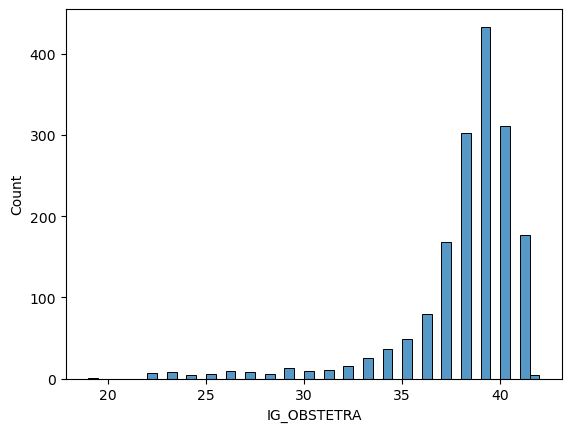

In [20]:
# Histograma
sns.histplot(dados.IG_OBSTETRA)

In [21]:
# IG_PEDIATRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.IG_PEDIATRA.describe()

count    1706.000000
mean       37.941970
std         3.189908
min         9.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_PEDIATRA, dtype: float64

<Axes: xlabel='IG_PEDIATRA', ylabel='Count'>

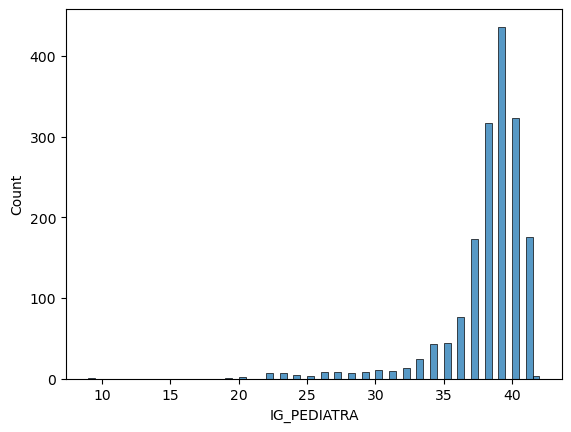

In [22]:
# Histograma
sns.histplot(dados.IG_PEDIATRA)

In [23]:
#  Limpeza de dados - 1 caso com IG = 9
dados.IG_PEDIATRA.value_counts()

IG_PEDIATRA
39.0    436
40.0    323
38.0    317
41.0    176
37.0    173
36.0     76
35.0     44
34.0     43
33.0     24
32.0     13
30.0     11
31.0     10
29.0      8
26.0      8
27.0      8
22.0      7
28.0      7
23.0      7
24.0      5
42.0      3
25.0      3
20.0      2
9.0       1
19.0      1
Name: count, dtype: int64

In [24]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 9
dados.IG_PEDIATRA.replace(9, np.nan, inplace=True)

dados.IG_PEDIATRA.describe()

count    1705.000000
mean       37.958944
std         3.112817
min        19.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_PEDIATRA, dtype: float64

<Axes: xlabel='IG_PEDIATRA', ylabel='Count'>

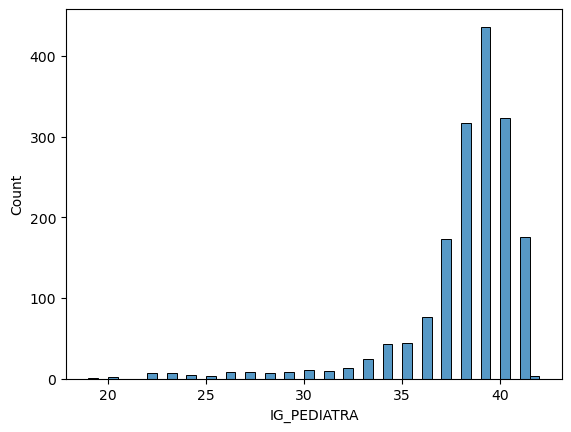

In [25]:
# Histograma
sns.histplot(dados.IG_PEDIATRA)

**Numéricas continuas**

In [26]:
dados.columns

Index(['Unnamed: 0', 'DT_INTERNACAO', 'DT_ALTA', 'DURACAO_INT', 'GESTACOES',
       'PARTOS', 'IG_OBSTETRA', 'IG_PEDIATRA', 'ALTO_RISCO', 'TIPO_PARTO',
       'HIPERTENSAO', 'GEMELAR', 'CESAREAS_PREVIAS', 'EPISIOTOMIA',
       'ANALGESIA', 'FORCEPS', 'CM_LACERACAO_CANAL', 'CM_UTI', 'CM_INFECCAO',
       'CM_NEARMISS', 'CM_TRANSFUSAO', 'VIVO', 'SEXO', 'PESO_NASCER', 'APGAR1',
       'APGAR5', 'UTI_RN', 'LIGADURACORDAO', 'LC_MOTIVO', 'EQUIPAMENTO_A',
       'EQUIPAMENTO_B', 'BAIRRO'],
      dtype='object')

In [27]:
# DURACAO_INT
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.DURACAO_INT.describe()

count    1709.000000
mean        3.019051
std         4.320177
min         0.768750
25%         1.606250
50%         2.070833
75%         2.852778
max        62.537500
Name: DURACAO_INT, dtype: float64

In [28]:
# analisar os casos
dados.DURACAO_INT

0        0.768750
1        0.773611
2        0.798611
3        0.807639
4        0.815972
          ...    
1704    37.604167
1705    45.618750
1706    47.984028
1707    54.895833
1708    62.537500
Name: DURACAO_INT, Length: 1709, dtype: float64

In [41]:
# Vamos arrendodar para dias inteiros
dados.DURACAO_INT = dados.DURACAO_INT.round(0)

<Axes: xlabel='DURACAO_INT', ylabel='Count'>

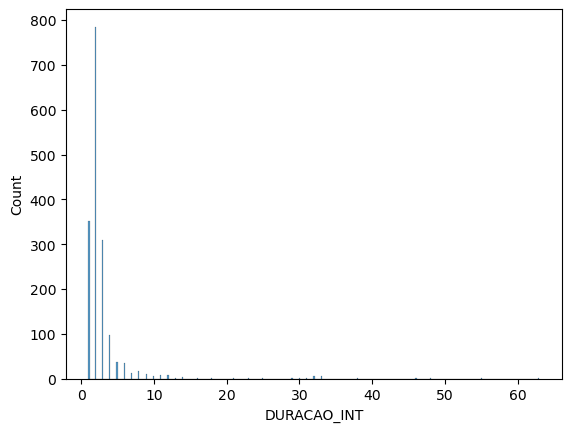

In [30]:
# Histograma
sns.histplot(dados.DURACAO_INT)

# Analisando variáveis do tipo datas - datetime

In [31]:
# Caso a variável não seja do tipo data - Converter o tipo de uma coluna OBJECT para DATETIME

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1709 non-null   int64         
 1   DT_INTERNACAO       1709 non-null   datetime64[ns]
 2   DT_ALTA             1709 non-null   datetime64[ns]
 3   DURACAO_INT         1709 non-null   float64       
 4   GESTACOES           1709 non-null   int64         
 5   PARTOS              1708 non-null   float64       
 6   IG_OBSTETRA         1687 non-null   float64       
 7   IG_PEDIATRA         1705 non-null   float64       
 8   ALTO_RISCO          1709 non-null   object        
 9   TIPO_PARTO          1709 non-null   int64         
 10  HIPERTENSAO         1709 non-null   int64         
 11  GEMELAR             1709 non-null   int64         
 12  CESAREAS_PREVIAS    1702 non-null   float64       
 13  EPISIOTOMIA         1709 non-null   int64       

In [39]:
# Explorar medidas resumo da coluna DT_INTERNACAO
descricao = dados['DT_INTERNACAO'].describe()

# Calcular outras medidas diretamente
media = dados['DT_INTERNACAO'].mean()
desvio_padrao = dados['DT_INTERNACAO'].std()
minimo = dados['DT_INTERNACAO'].min()
primeiro_quartil = dados['DT_INTERNACAO'].quantile(0.25)
mediana = dados['DT_INTERNACAO'].median()
terceiro_quartil = dados['DT_INTERNACAO'].quantile(0.75)
maximo = dados['DT_INTERNACAO'].max()

# Exibir todas as medidas
print("Descrição:")
print(descricao)
print("\nOutras Medidas:")
print("Média:", media)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("1º Quartil:", primeiro_quartil)
print("Mediana:", mediana)
print("3º Quartil:", terceiro_quartil)
print("Máximo:", maximo)


Descrição:
count                             1709
mean     2014-03-16 04:27:06.214160128
min                2013-09-27 00:00:00
25%                2013-12-16 00:00:00
50%                2014-03-05 00:00:00
75%                2014-05-29 00:00:00
max                2014-10-31 00:00:00
Name: DT_INTERNACAO, dtype: object

Outras Medidas:
Média: 2014-03-16 04:27:06.214160128
Desvio Padrão: 106 days 01:12:07.901471724
Mínimo: 2013-09-27 00:00:00
1º Quartil: 2013-12-16 00:00:00
Mediana: 2014-03-05 00:00:00
3º Quartil: 2014-05-29 00:00:00
Máximo: 2014-10-31 00:00:00


In [42]:
# Explorar medidas resumo da coluna DT_ALTA
descricao = dados['DT_ALTA'].describe()

# Calcular outras medidas diretamente
media = dados['DT_ALTA'].mean()
desvio_padrao = dados['DT_ALTA'].std()
minimo = dados['DT_ALTA'].min()
primeiro_quartil = dados['DT_ALTA'].quantile(0.25)
mediana = dados['DT_ALTA'].median()
terceiro_quartil = dados['DT_ALTA'].quantile(0.75)
maximo = dados['DT_ALTA'].max()

# Exibir todas as medidas
print("Descrição:")
print(descricao)
print("\nOutras Medidas:")
print("Média:", media)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("1º Quartil:", primeiro_quartil)
print("Mediana:", mediana)
print("3º Quartil:", terceiro_quartil)
print("Máximo:", maximo)


Descrição:
count                             1709
mean     2014-03-19 06:49:30.157986816
min                2013-09-29 00:00:00
25%                2013-12-19 00:00:00
50%                2014-03-08 00:00:00
75%                2014-06-02 00:00:00
max                2014-11-17 00:00:00
Name: DT_ALTA, dtype: object

Outras Medidas:
Média: 2014-03-19 06:49:30.157986816
Desvio Padrão: 106 days 02:55:34.760311652
Mínimo: 2013-09-29 00:00:00
1º Quartil: 2013-12-19 00:00:00
Mediana: 2014-03-08 00:00:00
3º Quartil: 2014-06-02 00:00:00
Máximo: 2014-11-17 00:00:00


<Axes: xlabel='DT_INTERNACAO'>

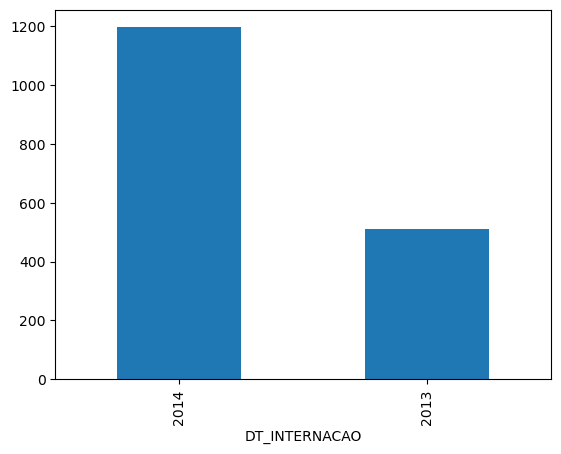

In [43]:
# contar por ano
tabela_DT_INTERNACAO = dados.DT_INTERNACAO.dt.year.value_counts()

# Criar gráfico por ano
tabela_DT_INTERNACAO.plot.bar()

<Axes: xlabel='DT_ALTA'>

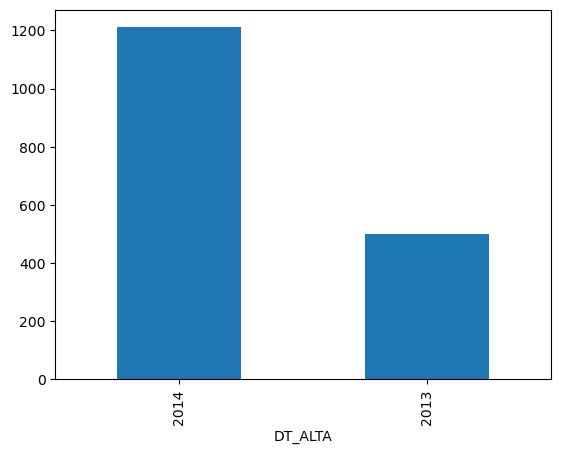

In [44]:
# contar por ano
tabela_DT_ALTA = dados.DT_ALTA.dt.year.value_counts()

# Criar gráfico por ano
tabela_DT_ALTA.plot.bar()

In [45]:
# Diferença em dias
dados['DIAS_INTERNACAO'] = dados.DT_ALTA - dados.DT_INTERNACAO

# mostrar
dados.DIAS_INTERNACAO

0       1 days
1       1 days
2       1 days
3       1 days
4       1 days
         ...  
1704   38 days
1705   46 days
1706   48 days
1707   55 days
1708   63 days
Name: DIAS_INTERNACAO, Length: 1709, dtype: timedelta64[ns]

Saiba mais em: https://towardsdatascience.com/3-useful-pandas-tips-to-work-with-datetime-data-424afbec628b

In [46]:
import datetime

# Criando uma nova coluna com a diferença em dias
dados['DT_CONSULTAPOS'] = dados.DT_ALTA + datetime.timedelta(days=15)

# datetime.timedelta  (days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

# https://docs.python.org/pt-br/3/library/datetime.html

# mostrar
dados.DT_CONSULTAPOS

0      2014-02-05
1      2014-06-06
2      2014-04-29
3      2013-12-20
4      2013-12-21
          ...    
1704   2014-08-27
1705   2014-06-25
1706   2014-01-06
1707   2013-12-13
1708   2014-05-29
Name: DT_CONSULTAPOS, Length: 1709, dtype: datetime64[ns]

In [48]:
# Importar a classe datetime do módulo datetime
from datetime import datetime

# Criar uma nova coluna 'DT_AGORA' e atribuir a data e hora atuais
dados['DT_AGORA'] = datetime.now()

# Exibir o valor da coluna 'DT_AGORA'
dados.DT_AGORA


0      2024-02-13 14:01:27.846890
1      2024-02-13 14:01:27.846890
2      2024-02-13 14:01:27.846890
3      2024-02-13 14:01:27.846890
4      2024-02-13 14:01:27.846890
                  ...            
1704   2024-02-13 14:01:27.846890
1705   2024-02-13 14:01:27.846890
1706   2024-02-13 14:01:27.846890
1707   2024-02-13 14:01:27.846890
1708   2024-02-13 14:01:27.846890
Name: DT_AGORA, Length: 1709, dtype: datetime64[ns]

In [49]:
# Fazer uma cópia da coluna DT_ALTA para outro dataset - para testes
dados2 = pd.DataFrame()

dados2["DATA"] = dados["DT_AGORA"]
dados2

,DATA
0,2024-02-13 14:01:27.846890
1,2024-02-13 14:01:27.846890
2,2024-02-13 14:01:27.846890
3,2024-02-13 14:01:27.846890
4,2024-02-13 14:01:27.846890
...,...
1704,2024-02-13 14:01:27.846890
1705,2024-02-13 14:01:27.846890
1706,2024-02-13 14:01:27.846890
1707,2024-02-13 14:01:27.846890


In [56]:


# Supondo que a coluna DT_AGORA seja originalmente do tipo string (object)
dados["DT_AGORA"] = pd.to_datetime(dados["DT_AGORA"])

# Agora, você pode extrair componentes de data e hora
dados["Year"] = dados["DT_AGORA"].dt.year
dados["Month"] = dados["DT_AGORA"].dt.month
dados["Day"] = dados["DT_AGORA"].dt.day
dados["Hour"] = dados["DT_AGORA"].dt.hour
dados["Minute"] = dados["DT_AGORA"].dt.minute
dados["Seconds"] = dados["DT_AGORA"].dt.second
dados["Timezone"] = dados["DT_AGORA"].dt.tz

# Exibir o DataFrame atualizado
print(dados)


      Unnamed: 0 DT_INTERNACAO    DT_ALTA  DURACAO_INT  GESTACOES  PARTOS  \
0              0    2014-01-20 2014-01-21          1.0          2     1.0   
1              1    2014-05-21 2014-05-22          1.0          1     0.0   
2              2    2014-04-13 2014-04-14          1.0          2     1.0   
3              3    2013-12-04 2013-12-05          1.0          2     1.0   
4              4    2013-12-05 2013-12-06          1.0          1     0.0   
...          ...           ...        ...          ...        ...     ...   
1704        1704    2014-07-05 2014-08-12         38.0          2     1.0   
1705        1705    2014-04-25 2014-06-10         46.0          2     1.0   
1706        1706    2013-11-04 2013-12-22         48.0          2     1.0   
1707        1707    2013-10-04 2013-11-28         55.0          3     0.0   
1708        1708    2014-03-12 2014-05-14         63.0          3     2.0   

      IG_OBSTETRA  IG_PEDIATRA ALTO_RISCO  TIPO_PARTO  ...  DIAS_INTERNACAO

In [ ]:
dados2

In [57]:
# Get Day name
dados2["DayName"] = dados2.DATA.dt.day_name()

# Get Month name
dados2["MonthName"] = dados2.DATA.dt.month_name()

dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName
0,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February
1,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February
2,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February
3,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February
4,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February


In [58]:
# Is it the Start of the Month?
dados2["IsMonthStart"] = dados2.DATA.dt.is_month_start

# Is it the Start of the Year?
dados2["IsYearStart"] = dados2.DATA.dt.is_year_start

# Is it the End of the Month?
dados2["IsMonthEnd"] = dados2.DATA.dt.is_month_end

# Is it the End of the Year?
dados2["IsYearEnd"] = dados2.DATA.dt.is_year_end

dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,IsMonthStart,IsYearStart,IsMonthEnd,IsYearEnd
0,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False
1,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False
2,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False
3,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False
4,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False


In [59]:
# Get only Date
dados2["OnlyDate"] = dados2.DATA.dt.date

# Get only Time
dados2["OnlyTime"] = dados2.DATA.dt.time

dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,IsMonthStart,IsYearStart,IsMonthEnd,IsYearEnd,OnlyDate,OnlyTime
0,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False,2024-02-13,14:01:27.846890
1,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False,2024-02-13,14:01:27.846890
2,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False,2024-02-13,14:01:27.846890
3,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False,2024-02-13,14:01:27.846890
4,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None,Tuesday,February,False,False,False,False,2024-02-13,14:01:27.846890


In [60]:
# Get Year
dados2["Year"] = dados2.DATA.dt.strftime('%Y')

# Get Month of a Year
dados2["Month"] = dados2.DATA.dt.strftime('%m')

# Get Day of a Month
dados2["Day"] = dados2.DATA.dt.strftime('%d')

# Get Hour of the day
dados2["Hour"] = dados2.DATA.dt.strftime('%H')

# Get Minute of the Hour
dados2["Minute"] = dados2.DATA.dt.strftime('%M')

# Get Seconds of the Minute
dados2["Seconds"] = dados2.DATA.dt.strftime('%S')

# Get Only Date
dados2["OnlyDate"] = dados2.DATA.dt.strftime('%D')

# Get Only Time
dados2["OnlyTime"] = dados2.DATA.dt.strftime('%T')

# Get Only Time - AM or PM format
dados2["OnlyTime-AMPM"] = dados2.DATA.dt.strftime('%r')

dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,IsMonthStart,IsYearStart,IsMonthEnd,IsYearEnd,OnlyDate,OnlyTime,OnlyTime-AMPM
0,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,False,False,False,False,02/13/24,14:01:27,02:01:27 PM
1,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,False,False,False,False,02/13/24,14:01:27,02:01:27 PM
2,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,False,False,False,False,02/13/24,14:01:27,02:01:27 PM
3,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,False,False,False,False,02/13/24,14:01:27,02:01:27 PM
4,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,False,False,False,False,02/13/24,14:01:27,02:01:27 PM


In [61]:
# Add Days
dados2["Date+Day"] = dados2.DATA + pd.Timedelta(2, 'days')

# Add Hour
dados2["Date+Hour"] = dados2.DATA + pd.Timedelta(2, 'hours')

# Add Minutes
dados2["Date+Minute"] = dados2.DATA + pd.Timedelta(2, 'minutes')

# Add Seconds
dados2["Date+Seconds"] = dados2.DATA + pd.Timedelta(2, 'seconds')

dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,...,IsYearStart,IsMonthEnd,IsYearEnd,OnlyDate,OnlyTime,OnlyTime-AMPM,Date+Day,Date+Hour,Date+Minute,Date+Seconds
0,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,False,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890
1,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,False,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890
2,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,False,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890
3,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,False,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890
4,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,False,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890


In [62]:
# Add Years
dados2["Date+Year"] = dados2.DATA + pd.DateOffset(years=2)

# Add Months
dados2["Date+Month"] = dados2.DATA + pd.DateOffset(months=2)

# Add Days
dados2["Date+Day"] = dados2.DATA + pd.DateOffset(days=2)

# Add Hour
dados2["Date+Hour"] = dados2.DATA + pd.DateOffset(hours=2)

# Add Minutes
dados2["Date+Minute"] = dados2.DATA + pd.DateOffset(minutes=2)

# Add Seconds
dados2["Date+Seconds"] = dados2.DATA + pd.DateOffset(seconds=2)


dados2.head()

,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,...,IsYearEnd,OnlyDate,OnlyTime,OnlyTime-AMPM,Date+Day,Date+Hour,Date+Minute,Date+Seconds,Date+Year,Date+Month
0,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890
1,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890
2,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890
3,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890
4,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,False,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890


In [64]:
# Adicionar um novo conjunto de datas à coluna 'DATA' do DataFrame 'dados2'
# Utilizando o método 'pd.DateOffset' para adicionar 1 mês e 1 dia às datas existentes
dados2["NewDates"] = dados2.DATA + pd.DateOffset(months=1, days=1)

# Exibir as primeiras linhas do DataFrame atualizado
dados2.head()


,DATA,Year,Month,Day,Hour,Minute,Seconds,Timezone,DayName,MonthName,...,OnlyDate,OnlyTime,OnlyTime-AMPM,Date+Day,Date+Hour,Date+Minute,Date+Seconds,Date+Year,Date+Month,NewDates
0,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890,2024-03-14 14:01:27.846890
1,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890,2024-03-14 14:01:27.846890
2,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890,2024-03-14 14:01:27.846890
3,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890,2024-03-14 14:01:27.846890
4,2024-02-13 14:01:27.846890,2024,02,13,14,01,27,None,Tuesday,February,...,02/13/24,14:01:27,02:01:27 PM,2024-02-15 14:01:27.846890,2024-02-13 16:01:27.846890,2024-02-13 14:03:27.846890,2024-02-13 14:01:29.846890,2026-02-13 14:01:27.846890,2024-04-13 14:01:27.846890,2024-03-14 14:01:27.846890


# Recodificação de variáveis

In [ ]:
# converter uma coluna texto para numerico (se tiver numeros e textos misturados)
# dados['Vento'] = pd.to_numeric(dados['Vento'], errors='coerce')

# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.

In [65]:
# TIPO_PARTO - Contando a quantidade de casos por categoria
dados.TIPO_PARTO.value_counts()

TIPO_PARTO
1    1056
2     653
Name: count, dtype: int64

In [66]:
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos (apenas para regressão)
# Já se sabe pela documentação da Base de dados que:
# 1 = partos vaginais
# 2 = partos cesáreos

dados.TIPO_PARTO.replace(1, 'Parto Normal', inplace=True)
dados.TIPO_PARTO.replace(2, 'Parto Cesáreo', inplace=True)
dados.TIPO_PARTO.value_counts()

TIPO_PARTO
Parto Normal     1056
Parto Cesáreo     653
Name: count, dtype: int64

In [67]:
# HIPERTENSAO - Contando a quantidade de casos por categoria
dados.HIPERTENSAO.value_counts()

HIPERTENSAO
0    1486
1     223
Name: count, dtype: int64

In [68]:
# HIPERTENSAO - recodificar ==>   0 = Não, 1 = Sim
dados.HIPERTENSAO.replace(0, 'Não', inplace=True)
dados.HIPERTENSAO.replace(1, 'Sim', inplace=True)
dados.HIPERTENSAO.value_counts()

HIPERTENSAO
Não    1486
Sim     223
Name: count, dtype: int64

In [69]:
# GEMELAR - Contando a quantidade de casos por categoria
dados.GEMELAR.value_counts()

GEMELAR
0    1641
1      68
Name: count, dtype: int64

In [70]:
# GEMELAR - recodificar ==>   0 = Não, 1 = Sim
dados.GEMELAR.replace(0, 'Não', inplace=True)
dados.GEMELAR.replace(1, 'Sim', inplace=True)
dados.GEMELAR.value_counts()

GEMELAR
Não    1641
Sim      68
Name: count, dtype: int64

In [71]:
# CM_TRANSFUSAO - Contando a quantidade de casos por categoria
dados.CM_TRANSFUSAO.value_counts()

CM_TRANSFUSAO
0.0    1674
1.0      32
Name: count, dtype: int64

In [72]:
# CM_TRANSFUSAO - recodificar ==>   0 = Não, 1 = Sim
dados.CM_TRANSFUSAO.replace(0, 'Não', inplace=True)
dados.CM_TRANSFUSAO.replace(1, 'Sim', inplace=True)
dados.CM_TRANSFUSAO.value_counts()

CM_TRANSFUSAO
Não    1674
Sim      32
Name: count, dtype: int64

In [73]:
# ALTO_RISCO - Contando a quantidade de casos por categoria
dados.ALTO_RISCO.value_counts()

ALTO_RISCO
não    889
sim    799
nao     11
Nao      7
Sim      2
Não      1
Name: count, dtype: int64

In [74]:
# ALTO_RISCO - Limpeza e Tratamento de dados, recodificando valores de texto
dados.ALTO_RISCO.replace('não', 'Não', inplace=True)
dados.ALTO_RISCO.replace('nao', 'Não', inplace=True)
dados.ALTO_RISCO.replace('Nao', 'Não', inplace=True)
dados.ALTO_RISCO.replace('sim', 'Sim', inplace=True)
dados.ALTO_RISCO.value_counts()

ALTO_RISCO
Não    908
Sim    801
Name: count, dtype: int64

In [75]:
# VIVO - Contando a quantidade de casos por categoria
dados.VIVO.value_counts()

VIVO
1.0    1642
0.0      31
Name: count, dtype: int64

In [76]:
# VIVO - recodificar ==>   0 = Nascido morto, 1 = Nascido vivo
dados.VIVO.replace(0, 'Nascido morto', inplace=True)
dados.VIVO.replace(1, 'Nascido vivo', inplace=True)
dados.VIVO.value_counts()

VIVO
Nascido vivo     1642
Nascido morto      31
Name: count, dtype: int64

In [77]:
# SEXO - Contando a quantidade de casos por categoria
dados.SEXO.value_counts()

SEXO
1    853
2    798
0     49
3      9
Name: count, dtype: int64

In [78]:
# SEXO - recodificar ==>
#  0 = missing (não preenchido), 1 = masculino, 2 = feminino, 3 = indeterminado

#  Para análise deste estudo, vamos considerar os valores 0 e 3 como missings (nulos)
#  Preencher com null (nan) os valores 0 e 3
dados.SEXO.replace(0, np.nan, inplace=True)
dados.SEXO.replace(3, np.nan, inplace=True)

# SEXO - recodificar ==>   1 = Masculino, 2 = Feminino
dados.SEXO.replace(1, 'Masculino', inplace=True)
dados.SEXO.replace(2, 'Feminino', inplace=True)

dados.SEXO.value_counts()

SEXO
Masculino    853
Feminino     798
Name: count, dtype: int64

In [79]:
# CM_LACERACAO_CANAL - Contando a quantidade de casos por categoria
dados.CM_LACERACAO_CANAL.value_counts()

CM_LACERACAO_CANAL
0.0    1147
1.0     253
2.0     126
3.0      27
4.0       1
Name: count, dtype: int64

In [80]:
# CM_LACERACAO_CANAL - recodificar ==>   0 = não houve, 1 = Grau I, 2 - Grau II, 3 - Grau III, 4 Grau IV
dados.CM_LACERACAO_CANAL.replace(0, 'Não houve', inplace=True)
dados.CM_LACERACAO_CANAL.replace(1, 'Grau I', inplace=True)
dados.CM_LACERACAO_CANAL.replace(2, 'Grau II', inplace=True)
dados.CM_LACERACAO_CANAL.replace(3, 'Grau III', inplace=True)
dados.CM_LACERACAO_CANAL.replace(4, 'Grau IV', inplace=True)
dados.CM_LACERACAO_CANAL.value_counts()

CM_LACERACAO_CANAL
Não houve    1147
Grau I        253
Grau II       126
Grau III       27
Grau IV         1
Name: count, dtype: int64

In [81]:
# LIGADURACORDAO - Contando a quantidade de casos por categoria
dados.LIGADURACORDAO.value_counts()

LIGADURACORDAO
2    1103
1     500
0     106
Name: count, dtype: int64

In [82]:
# LIGADURACORDAO - recodificar ==>   0 = Não, 1 = Sim, 2 = Não se aplica ou não informado
dados.LIGADURACORDAO.replace(0, 'Não', inplace=True)
dados.LIGADURACORDAO.replace(1, 'Sim', inplace=True)

#  Para análise deste estudo, vamos considerar os valores 2 como missings (nulos)
#  Preencher com null (nan) o valor 2
dados.LIGADURACORDAO.replace(2, np.nan, inplace=True)

dados.LIGADURACORDAO.value_counts()

LIGADURACORDAO
Sim    500
Não    106
Name: count, dtype: int64

In [83]:
# LC_MOTIVO - Contando a quantidade de casos por categoria
dados.LC_MOTIVO.value_counts()

LC_MOTIVO
0    1656
3      29
2      17
1       7
Name: count, dtype: int64

In [84]:
# LC_MOTIVO - recodificar ==>   0 = Não se aplica ou não informado, 1 Mãe soropositiva, 2 RN asfixia, 3 Aloimunização Rh
dados.LC_MOTIVO.replace(1, 'Mãe soropositiva', inplace=True)
dados.LC_MOTIVO.replace(2, 'RN com asfixia', inplace=True)
dados.LC_MOTIVO.replace(3, 'Aloimunização Rh', inplace=True)

#  Para análise deste estudo, vamos considerar os valores 0 como missings (nulos)
#  Preencher com null (nan) o valor 0
dados.LC_MOTIVO.replace(0, np.nan, inplace=True)

dados.LC_MOTIVO.value_counts()

LC_MOTIVO
Aloimunização Rh    29
RN com asfixia      17
Mãe soropositiva     7
Name: count, dtype: int64

In [ ]:
# Se precisar: esse código desabilita algumas mensagens de Warning, quando se faz recodificação de variáveis.
# pd.options.mode.chained_assignment = None
# default='warn'

# Salvar os dados atuais em um novo arquivo

In [85]:
# listar o DataFrame com a Limpeza e o tratamento de dados realizado
dados

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,...,DIAS_INTERNACAO,DT_CONSULTAPOS,DT_AGORA,Year,Month,Day,Hour,Minute,Seconds,Timezone
0,0,2014-01-20,2014-01-21,1.0,2,1.0,38.0,38.0,Sim,Parto Normal,...,1 days,2014-02-05,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
1,1,2014-05-21,2014-05-22,1.0,1,0.0,36.0,36.0,Sim,Parto Normal,...,1 days,2014-06-06,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
2,2,2014-04-13,2014-04-14,1.0,2,1.0,39.0,39.0,Não,Parto Normal,...,1 days,2014-04-29,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
3,3,2013-12-04,2013-12-05,1.0,2,1.0,41.0,41.0,Não,Parto Normal,...,1 days,2013-12-20,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
4,4,2013-12-05,2013-12-06,1.0,1,0.0,36.0,36.0,Não,Parto Normal,...,1 days,2013-12-21,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704,2014-07-05,2014-08-12,38.0,2,1.0,38.0,38.0,Não,Parto Normal,...,38 days,2014-08-27,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
1705,1705,2014-04-25,2014-06-10,46.0,2,1.0,29.0,34.0,Sim,Parto Cesáreo,...,46 days,2014-06-25,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
1706,1706,2013-11-04,2013-12-22,48.0,2,1.0,26.0,32.0,Sim,Parto Cesáreo,...,48 days,2014-01-06,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None
1707,1707,2013-10-04,2013-11-28,55.0,3,0.0,27.0,34.0,Sim,Parto Cesáreo,...,55 days,2013-12-13,2024-02-13 14:01:27.846890,2024,2,13,14,1,27,None


In [86]:
# salvar em excel, um novo arquivo, com os dados tratados
dados.to_excel("Roteiro_QDS04_atividade7.xlsx")